In [1]:
import numpy as np
import pandas as pd
import scipy
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("darkgrid")
%matplotlib inline

File was too big for github so heres the link to the Data: https://www.kaggle.com/mlg-ulb/creditcardfraud/data

In [2]:
df = pd.read_csv('creditcard.csv')
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [3]:
df.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

The dataset consists of 28 PCA components, Time, Amount, and Class columns. Class is a binary column 1 being fraud and 0 being a normal transaction.

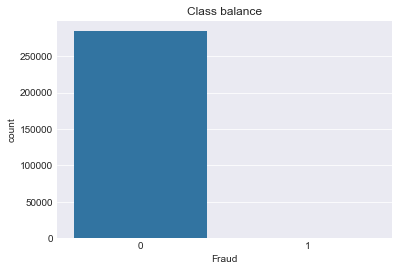

total transactions: 284807 
number of fraud: 492 
number of normal transactions: 284315


In [4]:
#Looking at class balance
total = df.shape[0]
num_fraud =  df['Class'].sum()
num_normal = total - num_fraud

plt.title('Class balance')
sns.countplot(x="Class", data=df)
plt.xlabel('Fraud')
plt.show()

print('total transactions: {} \nnumber of fraud: {} \nnumber of normal transactions: {}'.format(total, num_fraud, num_normal))

In [5]:
#Scale amount column
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df['Amount_scaled'] = scaler.fit_transform(df['Amount'].values.reshape(-1, 1))

#set X and y, split data into train and test sets
from sklearn.model_selection import train_test_split

X = df.drop([ 'Amount', 'Class'], axis=1)
y = df.loc[:, 'Class']

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.20)

In [6]:
#init svc, fit on training data set
from sklearn.svm import LinearSVC

clf = LinearSVC(C=.1)
clf.fit(X_train, y_train)

LinearSVC(C=0.1, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0)

In [7]:
train_pred = clf.predict(X_train)
test_pred = clf.predict(X_test)
train_s = clf.score(X_train, y_train)*100
test_s = clf.score(X_test, y_test)*100
from sklearn.metrics import confusion_matrix, classification_report

print('train:', train_s)
print(confusion_matrix(y_train, train_pred))
print(classification_report(y_train, train_pred))
print('\n')
print('test:', test_s)
print(confusion_matrix(y_test, test_pred))
print(classification_report(y_test, test_pred))

train: 99.843314534
[[227427     24]
 [   333     61]]
             precision    recall  f1-score   support

          0       1.00      1.00      1.00    227451
          1       0.72      0.15      0.25       394

avg / total       1.00      1.00      1.00    227845



test: 99.8472665988
[[56860     4]
 [   83    15]]
             precision    recall  f1-score   support

          0       1.00      1.00      1.00     56864
          1       0.79      0.15      0.26        98

avg / total       1.00      1.00      1.00     56962



SVM classifier did not perform well. The true positive rate is 55%. Going to try logistic regression

In [8]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report

clf = LogisticRegression(C=1, class_weight={0:1,1:10},tol=1e-10)
clf.fit(X_train, y_train)

train_pred = clf.predict(X_train)
test_pred = clf.predict(X_test)

print('train confusion matrix and report:')
print(confusion_matrix(y_train, train_pred))
print(classification_report(y_train, train_pred))

print('test confusion matrix and report:')
print(confusion_matrix(y_test, test_pred))
print(classification_report(y_test, test_pred))

train confusion matrix and report:
[[227361     90]
 [    72    322]]
             precision    recall  f1-score   support

          0       1.00      1.00      1.00    227451
          1       0.78      0.82      0.80       394

avg / total       1.00      1.00      1.00    227845

test confusion matrix and report:
[[56842    22]
 [   16    82]]
             precision    recall  f1-score   support

          0       1.00      1.00      1.00     56864
          1       0.79      0.84      0.81        98

avg / total       1.00      1.00      1.00     56962



This logistic regression model performs fairly well. We are prediciting fraud with 80%+ accuracy, which means two consecutive transactions of fraud would only occur with out being caught 4% of the time. The false positives are also very low, which means the bank would spend less time confirming transactions were legitimate.